# 🚀 Runner de Autoencoders (MNIST) — ejecuta `scripts/main.py`

Este notebook permite lanzar el **AE básico** y el **Denoising AE** de tu proyecto y ver los resultados *inline*.
- Asegúrate de que el proyecto está clonado y que `scripts/main.py` existe.
- Cambia `PROJECT_ROOT` si tu ruta local es distinta.


In [1]:
# ⛳ Configuración de rutas
from pathlib import Path
import os, glob
from IPython.display import Image, display

# Cambia esta ruta si tu proyecto está en otra ubicación
PROJECT_ROOT = Path("/home/malezainia2/mini_projects/machine_learning_projects/Modulo7Clase3MarcoParra").resolve()

MAIN = PROJECT_ROOT / "scripts" / "main.py"
OUT_DIR = PROJECT_ROOT / "outputs_ae"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("MAIN exists? ", MAIN.exists())
OUT_DIR.mkdir(parents=True, exist_ok=True)

PROJECT_ROOT: /home/malezainia2/mini_projects/machine_learning_projects/Modulo7Clase3MarcoParra
MAIN exists?  True


In [2]:
# 🔎 Verificar GPU (opcional)
try:
    import tensorflow as tf
    print("GPUs visibles:", tf.config.list_physical_devices('GPU'))
except Exception as e:
    print("TensorFlow no disponible o sin GPU:", e)

2025-08-24 21:12:08.623614: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 21:12:08.642446: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-24 21:12:08.642465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-24 21:12:08.643037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-24 21:12:08.646488: I tensorflow/core/platform/cpu_feature_guar

GPUs visibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


2025-08-24 21:12:09.411455: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-24 21:12:09.412765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-24 21:12:09.433171: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## 🔹 Ejecutar Autoencoder **Básico**

2025-08-24 21:12:17.659970: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 21:12:17.678502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-24 21:12:17.678522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-24 21:12:17.679057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-24 21:12:17.682107: I tensorflow/core/platform/cpu_feature_guar

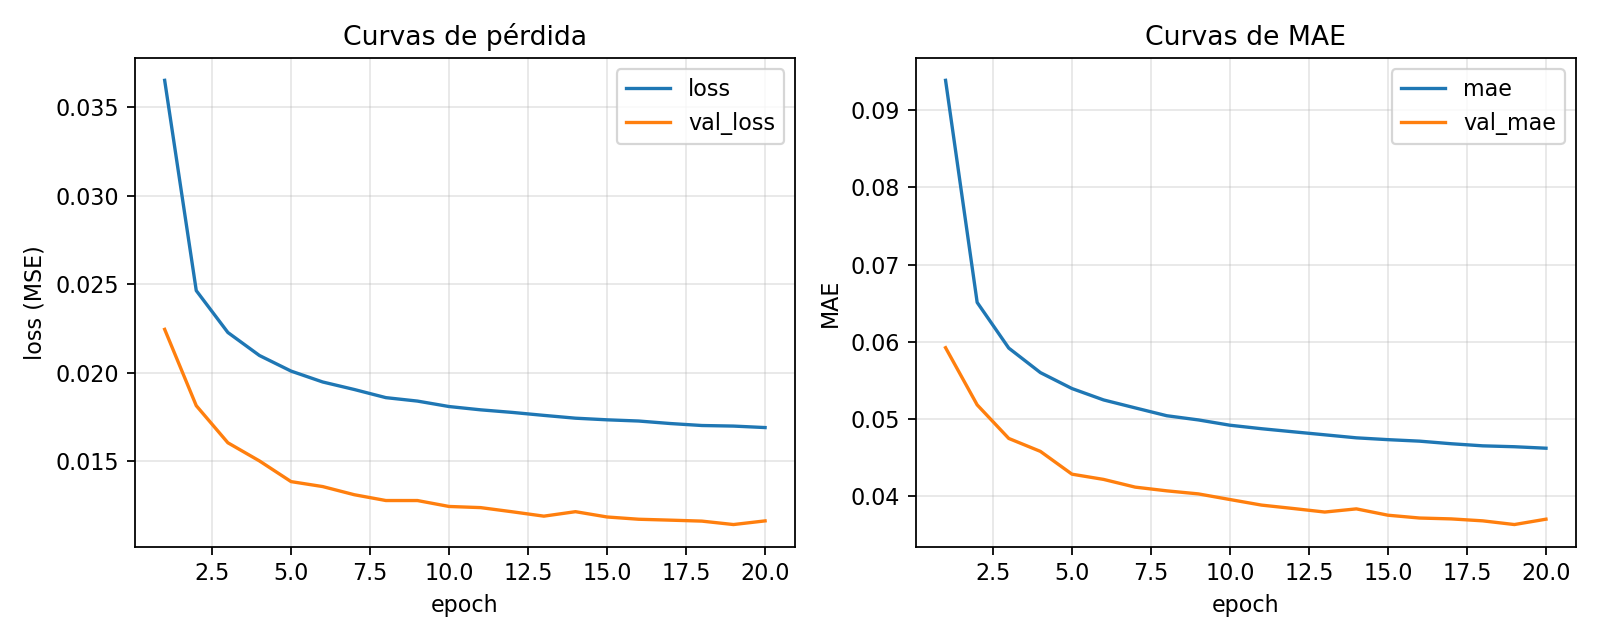

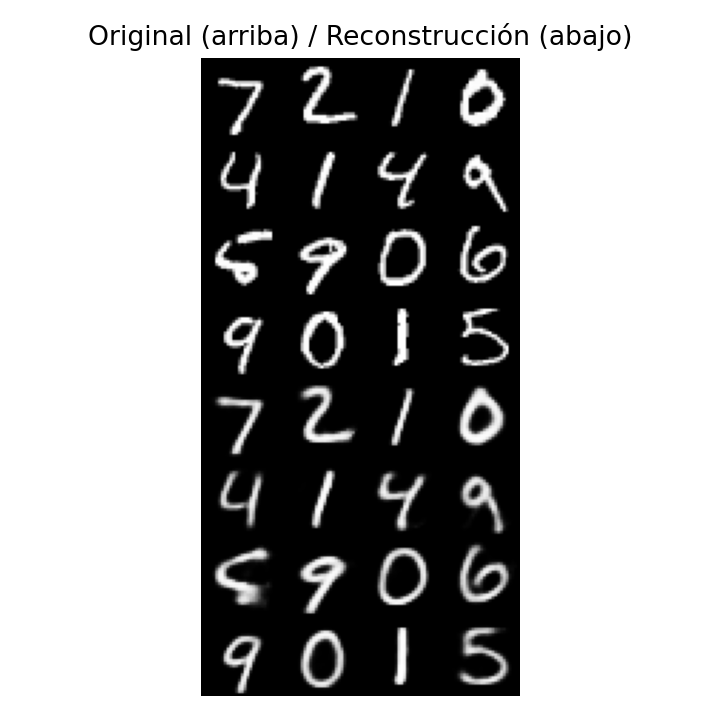

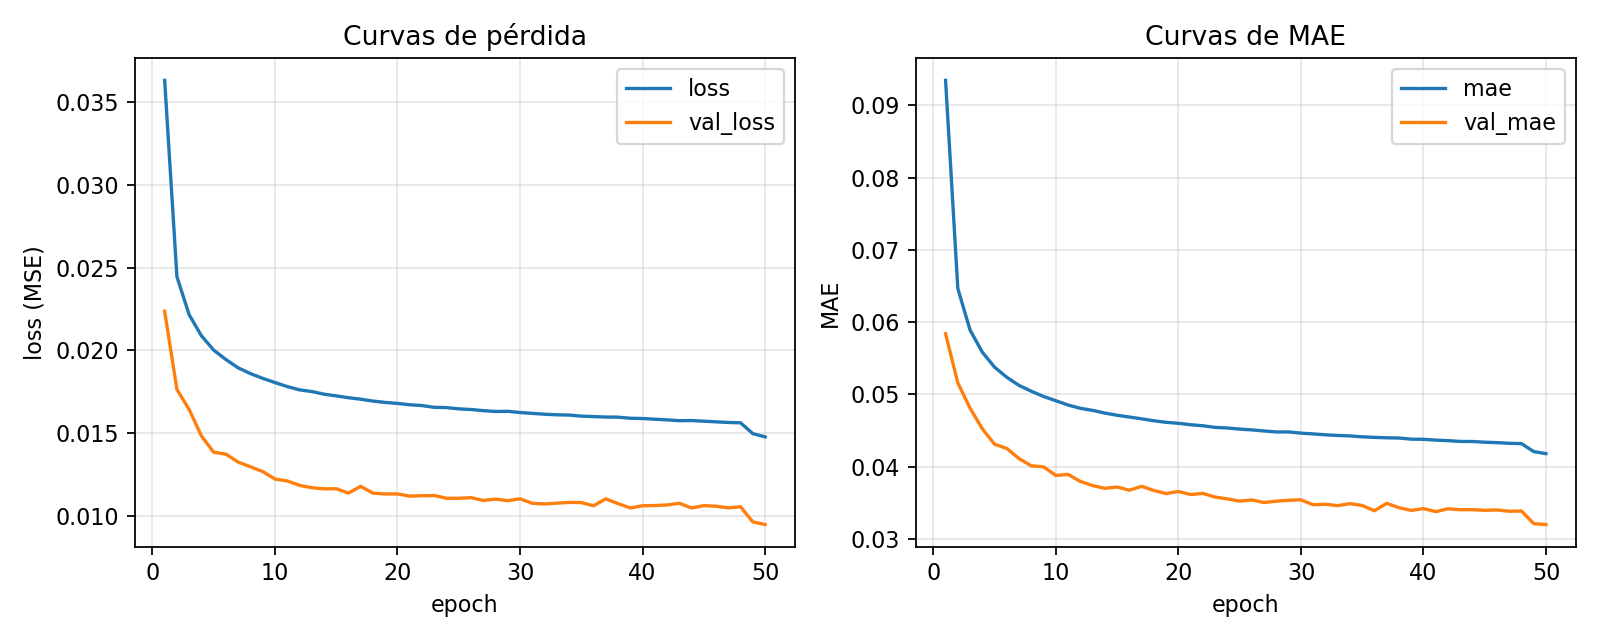

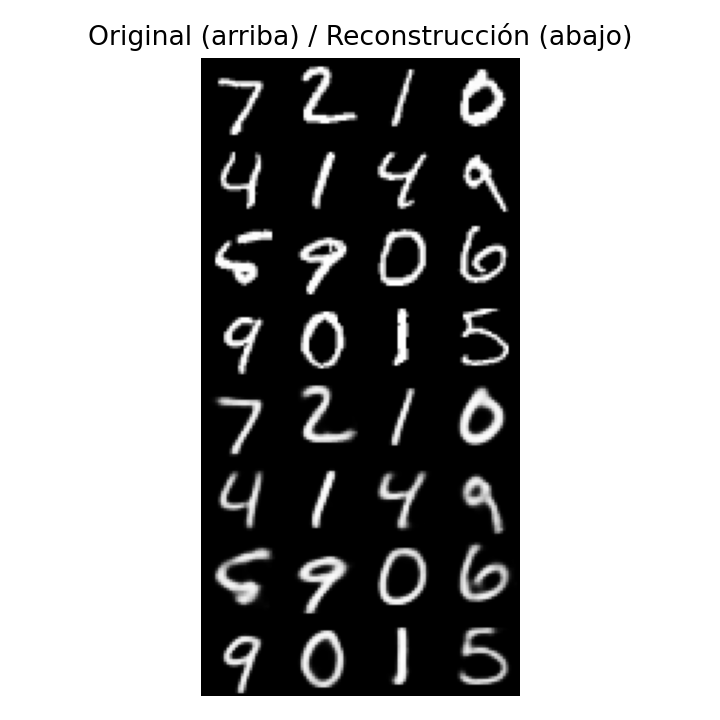

In [3]:
# Ejecuta el AE básico
!CUDA_VISIBLE_DEVICES=0 python "{str(MAIN)}" --mode basic --epochs 20 --batch-size 128

# Mostrar imágenes generadas
for png in sorted(glob.glob(str(OUT_DIR / "ae_basic*.png"))):
    display(Image(png))

## 🔹 Ejecutar **Denoising Autoencoder**

2025-08-24 21:13:16.809825: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 21:13:16.828680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-24 21:13:16.828703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-24 21:13:16.829240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-24 21:13:16.832336: I tensorflow/core/platform/cpu_feature_guar

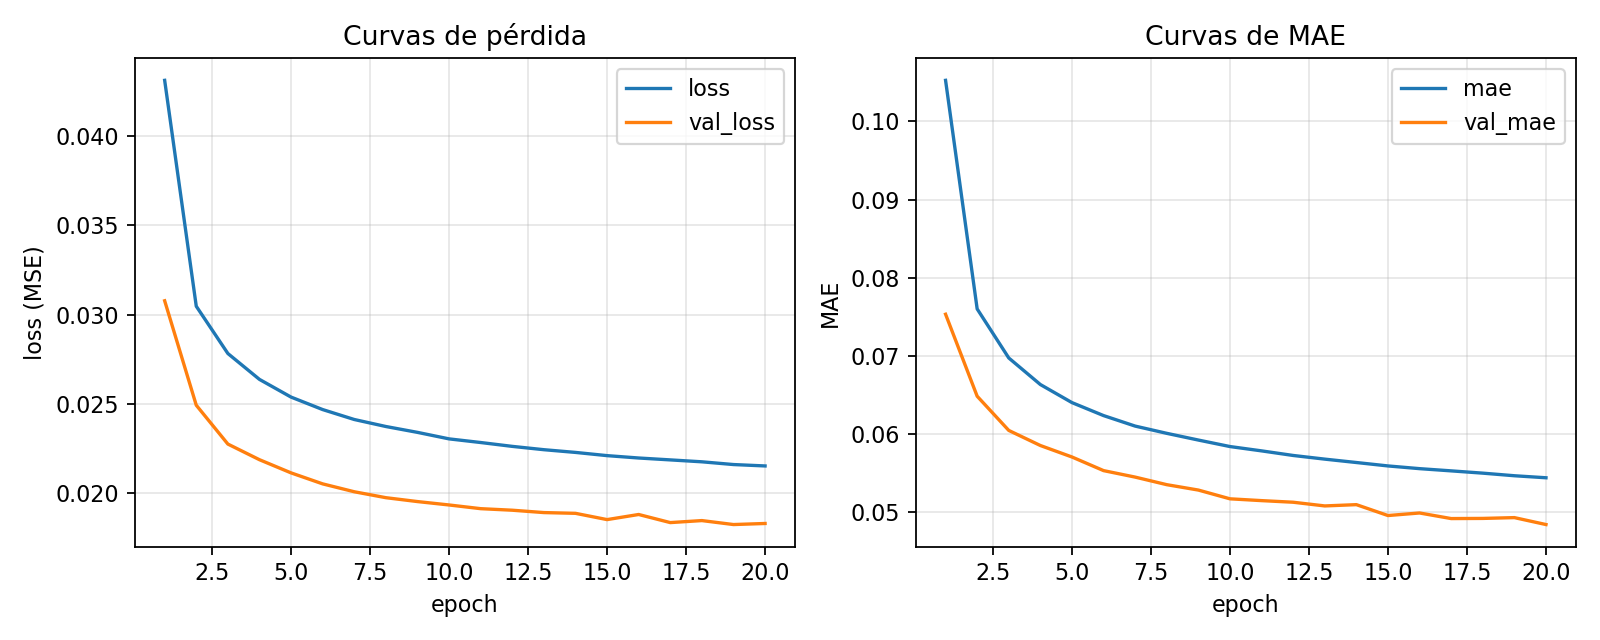

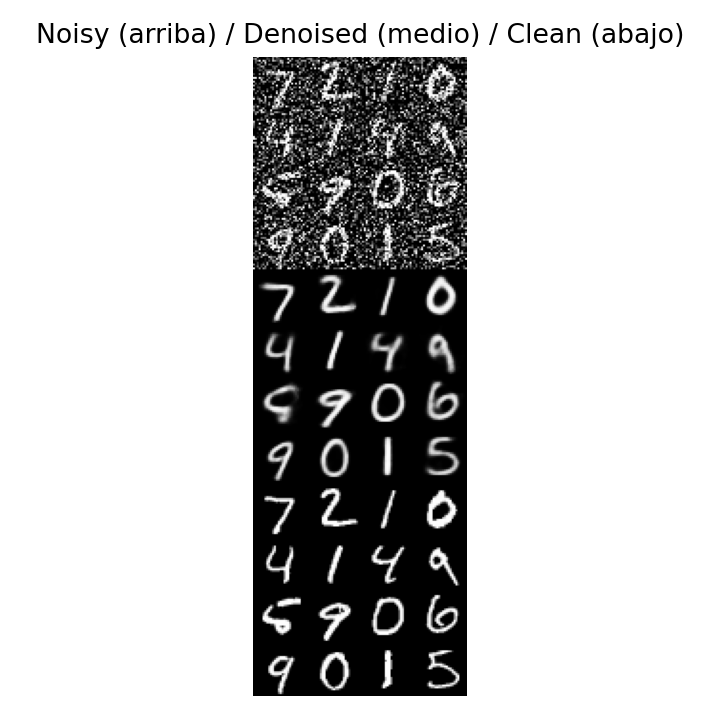

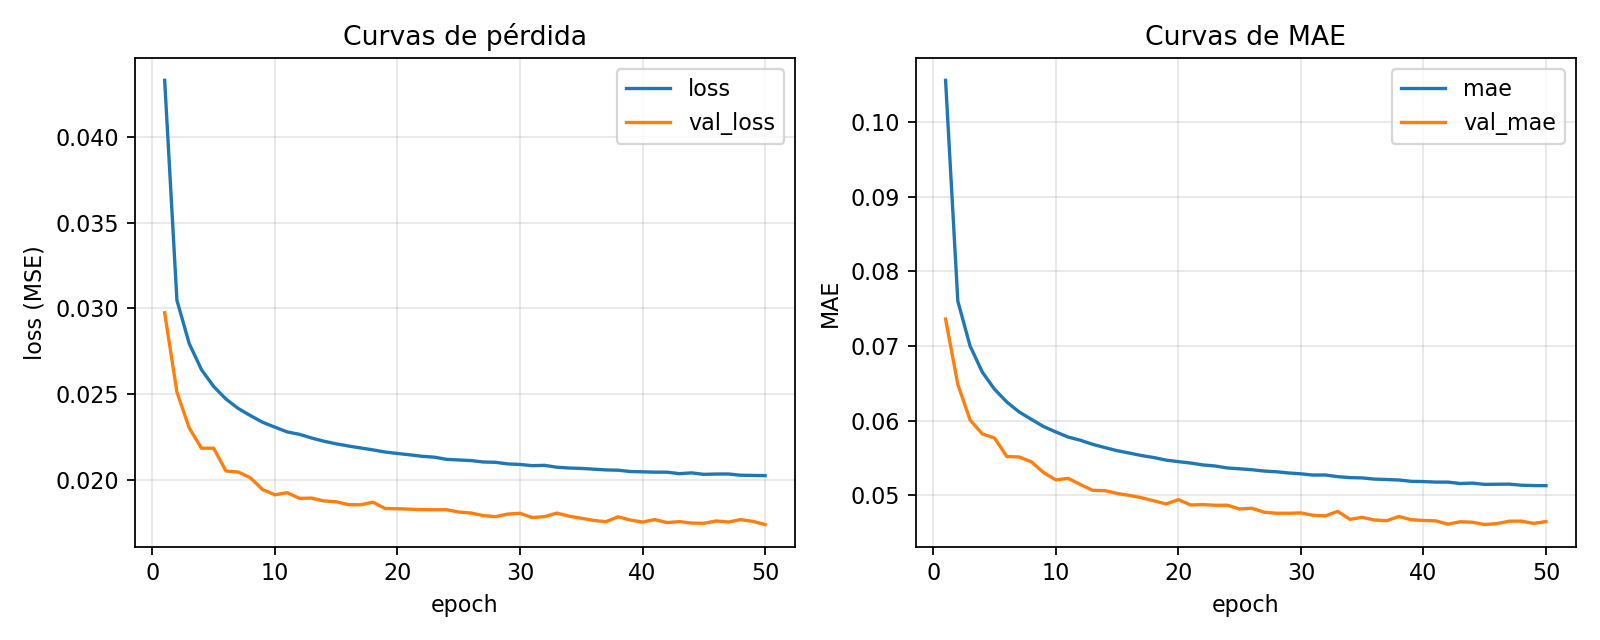

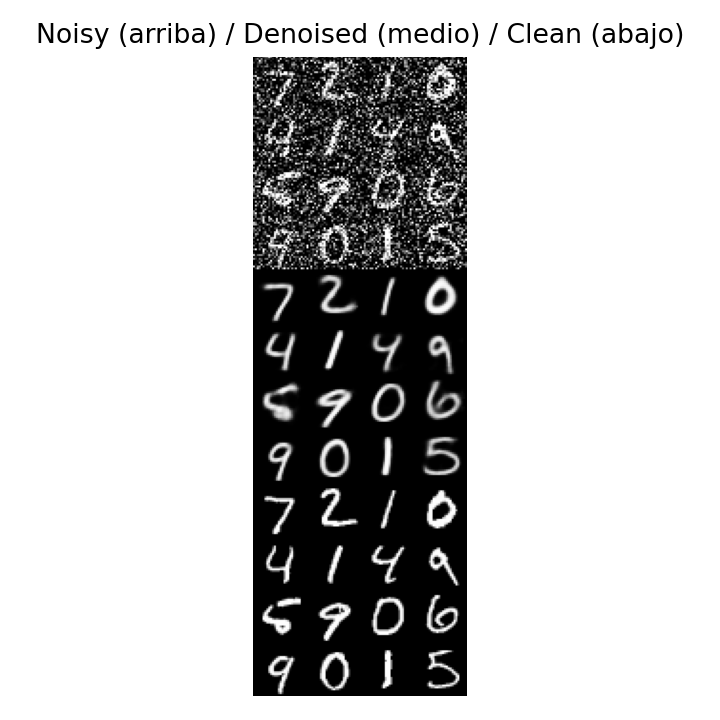

In [4]:
# Ejecuta el Denoising AE (ruido gaussiano)
!CUDA_VISIBLE_DEVICES=0 python "{str(MAIN)}" --mode denoise --epochs 20 --batch-size 128 --sigma 0.5

# Mostrar imágenes generadas
for png in sorted(glob.glob(str(OUT_DIR / "ae_denoise*.png"))):
    display(Image(png))

## 📈 (Opcional) Graficar métricas desde los JSON de *history*

Plot -> ae_basic__lr0.001__bs128__ep20_history.json


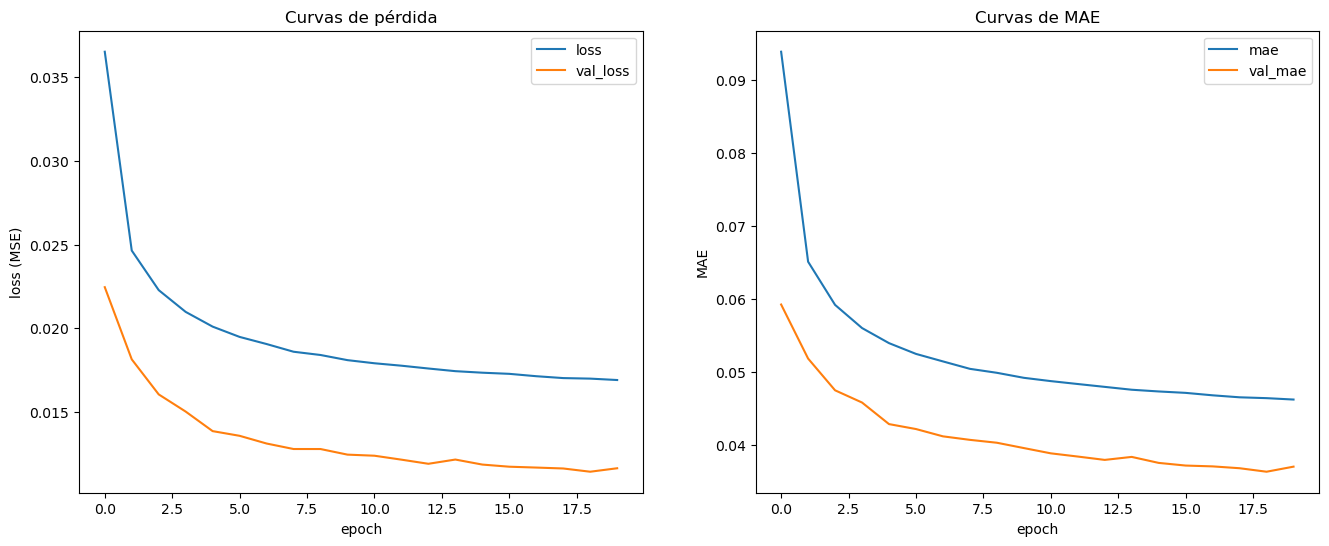

Plot -> ae_basic__lr0.001__bs128__ep50_history.json


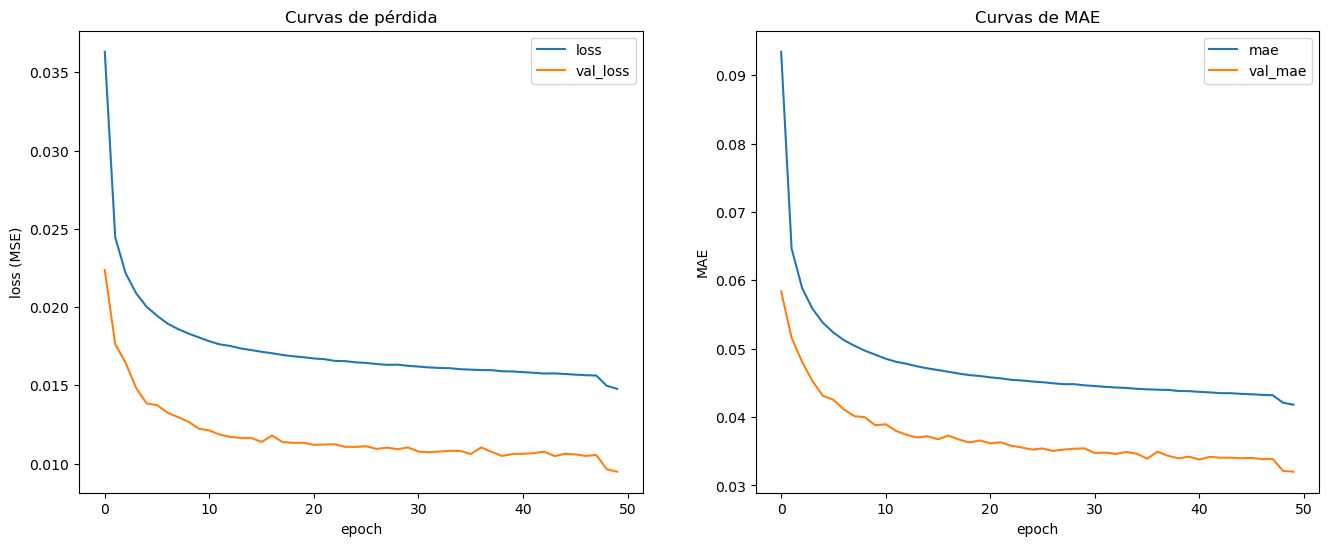

Plot -> ae_denoise__lr0.001__bs128__ep20__sigma0.5_history.json


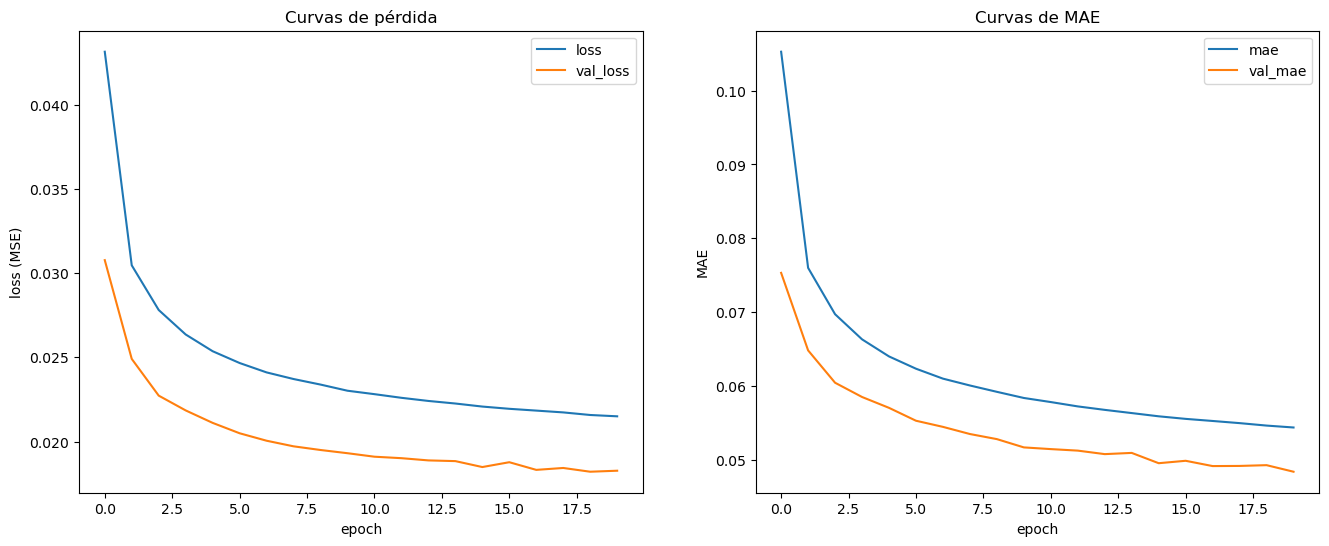

Plot -> ae_denoise__lr0.001__bs128__ep50__sigma0.5_history.json


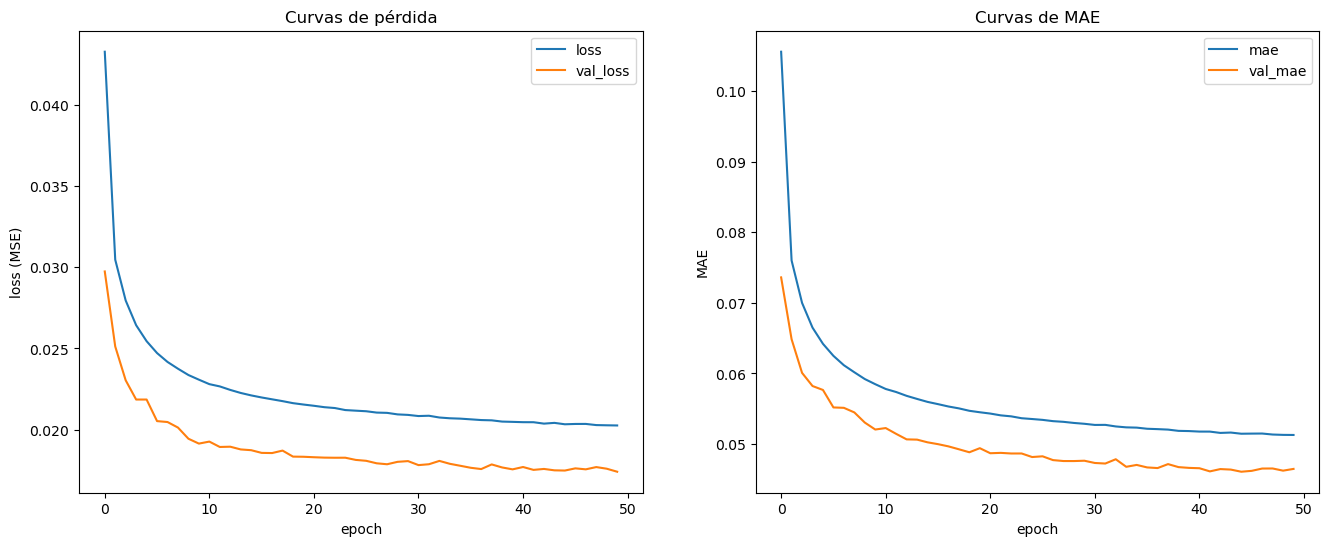

In [5]:
import json
import matplotlib.pyplot as plt

def plot_history(json_path):
    with open(json_path, "r") as f:
        h = json.load(f)
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].plot(h.get("loss", []), label="loss")
    ax[0].plot(h.get("val_loss", []), label="val_loss")
    ax[0].set_title("Curvas de pérdida"); ax[0].set_xlabel("epoch"); ax[0].set_ylabel("loss (MSE)"); ax[0].legend()
    ax[1].plot(h.get("mae", []), label="mae")
    ax[1].plot(h.get("val_mae", []), label="val_mae")
    ax[1].set_title("Curvas de MAE"); ax[1].set_xlabel("epoch"); ax[1].set_ylabel("MAE"); ax[1].legend()
    plt.show()

for f in sorted(OUT_DIR.glob("*_history.json")):
    print("Plot ->", f.name)
    plot_history(f)